# PREPARATION

## import librairies

In [1]:
%load_ext autoreload
%autoreload 2

# Indispensables
import pandas as pd
import numpy as np
#import math
print('Panda version: %s' % pd.__version__)
print('Numpy version: %s' % np.__version__)

import sklearn
print('SCIKIT LEARN version: %s' % sklearn.__version__)
# pip install scikit-plot
import scikitplot as skplt
print('SCIKIT PLOT version: %s' % skplt.__version__)


# general
import os
from os import listdir
#from os.path import isfile, join
#from os import walk
import sys
import io
import glob
import platform
#
print(os.name, "\n", platform.system(), "\n", platform.release())
#
import argparse
#from datetime import datetime
#import h5py
#import importlib

# VISU
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
#import matplotlib.colors as mcolors
#from matplotlib.colors import LogNorm

# IMAGES
#from IPython.display import Image, IFrame
#from PIL import Image
#import rasterio
import imageio

import colorsys

print('MATPLOTLIB version: %s' % matplotlib.__version__)
print('Seaborn version: %s' % sns.__version__)

import geopandas as gpd
print('Geo Panda version: %s' % gpd.__version__)

%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Panda version: 1.0.2
Numpy version: 1.18.1
SCIKIT LEARN version: 0.22.1
SCIKIT PLOT version: 0.3.7
posix 
 Darwin 
 18.0.0
MATPLOTLIB version: 3.2.0
Seaborn version: 0.10.0
Geo Panda version: 0.7.0


In [2]:
import laspy
#import pcl

#print('PCL version: %s' % pcl.__version__)
print('LASPY version: %s' % laspy.__version__)


LASPY version: 1.6.0


In [3]:
from __future__ import print_function

# Machine Lerning
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
# pip install scikit-plot, ann_visualizer
import scikitplot as skplt

import graphviz   # need ALL *graphv* from ANACONDA
from ann_visualizer.visualize import ann_viz;

import tensorflow as tf

import keras
from keras.utils.vis_utils import plot_model
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation     #LSTM
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D
from keras import backend as K
from keras.callbacks import History
#
from keras.preprocessing.image import load_img, save_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
#
from keras.optimizers import SGD
from keras.regularizers import l2

print('TensorFlow: %s' % tf.__version__)
print('Keras: %s' % keras.__version__)

# for plots
import pydot
import pydotplus
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import model_to_dot


/Users/pl/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/Users/pl/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/Users/pl/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/Users/pl/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (

TensorFlow: 1.13.1
Keras: 2.3.1


## Déclaration des directories et variables

In [4]:
#. initialisation des variables utilisées
df_RES = None
BASE_DIR = os.getcwd()
#

separe = "/"
# Laptop
if platform.system() == 'Darwin' and platform.release() == '18.7.0':
    DATA_DIR  = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/"
    DATA_DIR2 = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA2/"
    DATA_DIR3 = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA3/"
    DATA_DIR9 = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/"
    DATA_DIR10 = "/Users/pierreleisy/Data_Science/NOTEBOOK/"
# sur IMAC
else:   #if platform.system() == 'Darwin' and platform.release() == '18.0.0':
    DATA_DIR  = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/"
    DATA_DIR2 = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA2/"
    DATA_DIR3 = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA3/"
    DATA_DIR9 = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/"
    DATA_DIR10 = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/"
## Eurométropole
if platform.system() == 'Windows':
    DATA_DIR  = "S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA\\"
    DATA_DIR2 = "S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA2\\"
    DATA_DIR3 = "S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA3\\"
    DATA_DIR9 = "C:\\Users\\STG3841\\Mes Documents (local)\\travail\\"
    separe = "\\"   
 #   
DALLE_NUM  = DATA_DIR  + "DallesNumPoints5m" + separe
DALLE_ECA  = DATA_DIR  + "DallesEcartZ5m" + separe
DALLE_POS  = DATA_DIR  + "DallesPosition5m" + separe
#
DALLE_NUM2 = DATA_DIR2 + "DallesNumPoints5m" + separe
DALLE_ECA2 = DATA_DIR2 + "DallesEcartZ5m" + separe
DALLE_POS2 = DATA_DIR2 + "DallesPosition5m" + separe
#
DALLE_NUM3 = DATA_DIR3 + "DallesNumPoints5m" + separe
DALLE_ECA3 = DATA_DIR3 + "DallesEcartZ5m" + separe
DALLE_POS3 = DATA_DIR3 + "DallesPosition5m" + separe
print("Working directory:",BASE_DIR)
print("Data ROOT directory:",DATA_DIR)

sys.path.append(DATA_DIR)
sys.path.append(os.path.join(DATA_DIR,'DallesNumPoints5m\\'))
sys.path

Working directory: /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK
Data ROOT directory: /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/


['/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK',
 '/Users/pl/anaconda3/lib/python37.zip',
 '/Users/pl/anaconda3/lib/python3.7',
 '/Users/pl/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/Users/pl/anaconda3/lib/python3.7/site-packages',
 '/Users/pl/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/pl/.ipython',
 '/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/',
 '/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/DallesNumPoints5m\\']

## création des listes d'images

In [5]:
#liste1 = [f for f in listdir(DALLE_NUM) if isfile(join(DALLE_NUM, f))]
liste_11 = [f for f in glob.glob(DALLE_NUM  + separe + "*.tif", recursive=True)]#   #only first N for test
liste_12 = [f for f in glob.glob(DALLE_ECA  + separe + "*.tif", recursive=True)]#
liste_13 = [f for f in glob.glob(DALLE_POS  + separe + "*.tif", recursive=True)]#

liste_21 = [f for f in glob.glob(DALLE_NUM2 + separe + "*.tif", recursive=True)]#   #only first N for test
liste_22 = [f for f in glob.glob(DALLE_ECA2 + separe + "*.tif", recursive=True)]#
liste_23 = [f for f in glob.glob(DALLE_POS2 + separe + "*.tif", recursive=True)]#

liste_31 = [f for f in glob.glob(DALLE_NUM3 + separe + "*.tif", recursive=True)]#   #only first N for test
liste_32 = [f for f in glob.glob(DALLE_ECA3 + separe + "*.tif", recursive=True)]#
liste_33 = [f for f in glob.glob(DALLE_POS3 + separe + "*.tif", recursive=True)]#

print(len(listdir(DALLE_NUM)), len(liste_11), len(liste_12), len(liste_13))
print(len(listdir(DALLE_NUM)), len(liste_21), len(liste_22), len(liste_23))
print(len(listdir(DALLE_NUM)), len(liste_31), len(liste_32), len(liste_33))

liste_NUM = os.listdir(DALLE_NUM)
liste_ECA = os.listdir(DALLE_ECA)
liste_POS = os.listdir(DALLE_POS)
print(len(liste_NUM), len(liste_ECA), len(liste_POS))

29387 29384 29384 29384
29387 1408 1408 1408
29387 0 0 0
29387 29389 29384


# DONNEES

## LASPY ou autre librairies NUAGES de POINTS

In [6]:
import laspy

# Open a file in read mode:
inFile = laspy.file.File(DATA_DIR9 + "2043000_7272500_Lidar_15-16.las")
# Grab a numpy dataset of our clustering dimensions:
dataset = np.vstack([inFile.x, inFile.y, inFile.z]).transpose()
dataset.shape

(5030868, 3)

In [8]:
%%time
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step
        
#ground points grid filter
n = 100 #grid step

dataset_Z_filtered = dataset[[0]]

zfiltered = (dataset[:, 2].max() - dataset[:, 2].min())/10 

#setting height filtered from ground
print('zfiltered =', zfiltered)
xstep = (dataset[:, 0].max() - dataset[:, 0].min())/n
ystep = (dataset[:, 1].max() - dataset[:, 1].min())/n

for x in frange (dataset[:, 0].min(), dataset[:, 0].max(), xstep):
    for y in frange (dataset[:, 1].min(), dataset[:, 1].max(), ystep):
        datasetfiltered = dataset[(dataset[:,0] > x)
                             &(dataset[:, 0] < x+xstep)
                             &(dataset[:, 1] > y)
                             &(dataset[:, 1] < y+ystep)]
    if datasetfiltered.shape[0] > 0:
        datasetfiltered = datasetfiltered[datasetfiltered[:, 2]
                        >(datasetfiltered[:, 2].min()+ zfiltered)]
        if datasetfiltered.shape[0] > 0:
            dataset_Z_filtered = np.concatenate((dataset_Z_filtered,
                                             datasetfiltered))
print('dataset_Z_filtered shape', dataset_Z_filtered.shape)

zfiltered = 3.0390000000000015
dataset_Z_filtered shape (8115, 3)
CPU times: user 3min 49s, sys: 352 ms, total: 3min 50s
Wall time: 3min 50s


In [9]:
print("Examining Point Format: ")
pointformat = inFile.point_format
for spec in inFile.point_format:
    print(spec.name)

Examining Point Format: 
X
Y
Z
intensity
flag_byte
raw_classification
scan_angle_rank
user_data
pt_src_id
gps_time
red
green
blue


In [10]:
print('Z range =', dataset[:, 2].max() - dataset[:, 2].min())
print('Z max   =', dataset[:, 2].max(), 'Z min =', dataset[:, 2].min())
print('Y range =', dataset[:, 1].max() - dataset[:, 1].min())
print('Y max   =', dataset[:, 1].max(), 'Y min =', dataset[:, 1].min())
print('X range =', dataset[:, 0].max() - dataset[:, 0].min())
print('X max   =', dataset[:, 0].max(), 'X min =', dataset[:, 0].min())

Z range = 30.390000000000015
Z max   = 173.93 Z min = 143.54
Y range = 499.9900000002235
Y max   = 7272999.99 Y min = 7272500.0
X range = 499.9899999999907
X max   = 2043499.99 X min = 2043000.0


In [11]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import path

dataset = preprocessing.normalize(dataset)
dataset_Z_filtered = preprocessing.normalize(dataset_Z_filtered)

In [ ]:
clustering = DBSCAN(eps=2, min_samples=5, leaf_size=30).fit(dataset)
#clustering = DBSCAN(eps=2, min_samples=5, leaf_size=30).fit(dataset_Z_filtered)


In [ ]:
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
labels = clustering.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

In [ ]:
# Black removed and is used for noise instead.
fig = plt.figure(figsize=[100, 50])
ax = fig.add_subplot(111, projection=’3d’)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)

for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
    # Black used for noise.
            col = [0, 0, 0, 1]
            class_member_mask = (labels == k)
        xyz = dataset[class_member_mask & core_samples_mask]
        ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], c=col, marker=”.”)
        
plt.title(‘Estimated number of cluster: %d’ % n_clusters_)
plt.show()

## TEST:  Lecture autres fichiers

In [7]:
f_lamp = DATA_DIR  + "lampadaires2.csv"
f_mobi = DATA_DIR  + "mobilier_amenagement2.csv"

lampad = pd.read_csv(f_lamp, sep=",",header=0, encoding = "utf-8")
#print(lampad.head(3))

mobilier = pd.read_csv(f_mobi, sep=",", header=0, encoding = "utf-8")
print(mobilier.shape)
mobilier2 = mobilier[mobilier['type_entite'] == 'banc_public']
print(mobilier2.shape)
mobilier2.head(3)

(24848, 15)
(10184, 15)


,gid,ident_gy,code_precision,date_leve,auteur,observ_autre,date_reco,date_modif,type_entite,z_sol,orientation,echelle_x,echelle_y,date_creation,date_maj
0,40074,NaN,rattache,2018/11/17 00:00:00,Clauss,NaN,2018/10/01 00:00:00,NaN,banc_public,139.26,NaN,NaN,NaN,2018/11/30 09:34:12,2019/05/09 16:17:16
1,192,54449499.0,rattache,2011/12/02 00:00:00,Brundaller,NaN,2019/09/01 00:00:00,NaN,banc_public,147.25,NaN,NaN,NaN,2014/01/18 14:15:10,2020/02/20 10:24:48
4,31635,NaN,rattache,2016/05/05 00:00:00,Clauss,NaN,2019/05/07 00:00:00,NaN,banc_public,141.16,NaN,NaN,NaN,2016/11/15 10:57:00,2019/10/28 15:15:04


In [8]:
#import geopandas as gpd

gdf_lamp = gpd.read_file(DATA_DIR  + "lampadaires.shp")                           
gdf_lamp.head()


,gid,ident_gy,code_preci,date_leve,auteur,date_reco,angle_g,z_sol,date_creat,date_maj,geometry
0,151,69204241.0,rattache,1998/09/01 00:00:00.000,Muller C,2017/10/23 00:00:00.000,-42.4,158.56,2014/01/18 13:58:37.000,2018/02/12 14:08:52.000,POINT (2046319.603 7283270.659)
1,152,69204199.0,rattache,1998/09/01 00:00:00.000,Muller C,2017/10/23 00:00:00.000,-57.6,157.94,2014/01/18 13:58:37.000,2018/02/12 14:09:00.000,POINT (2045855.457 7283330.024)
2,153,69204198.0,rattache,1998/09/01 00:00:00.000,Muller C,2017/10/23 00:00:00.000,0.0,160.34,2014/01/18 13:58:37.000,2018/02/12 14:09:00.000,POINT (2046065.952 7283614.279)
3,154,69204197.0,rattache,1998/09/01 00:00:00.000,Muller C,2017/10/23 00:00:00.000,-58.9,157.95,2014/01/18 13:58:37.000,2018/02/12 14:09:00.000,POINT (2046062.432 7283583.205)
4,155,69204071.0,rattache,1998/09/01 00:00:00.000,Muller C,2017/10/23 00:00:00.000,-163.4,149.73,2014/01/18 13:58:37.000,2018/02/12 14:09:24.000,POINT (2045854.604 7282886.637)


In [9]:
from shapely.geometry import Point, LineString, MultiLineString

gdf_mobi = gpd.read_file(DATA_DIR  + "mobilier_amenagement.shp")
gdf_mobi2 = gdf_mobi[gdf_mobi['type_entit'] == 'banc_public']
# Type MULTILINESTRING  gdf_mobi2.head(76)

In [10]:
#  Formes des fichiers des bancs publics
#from shapely.geometry import shape

gdf_mobi3 = gdf_mobi2.head(80)
print(gdf_mobi2.shape, gdf_mobi3.shape)

#for boundary in gdf_mobi3['geometry']:
#    print(boundary.xy)

maxi = 0
nb = 0
#for i, row in gdf_mobi2.iterrows():
for i, row in gdf_mobi3.iterrows():
    ligne = row['geometry']
    nbre = 0
    if ligne.geom_type == "LineString":
        nbre = len(ligne.coords)
        #x, y = ligne.centroid.x, ligne.centroid.y
        #print(i, x, y)
    elif ligne.geom_type == "MultiLineString":
        nb += 1
        for line in ligne:
            nbre += len(line.coords)
    #print(i, nbre, forme)
    if nbre > maxi:
        maxi = nbre
    #for pt in list(row['geometry'].coords):
        
print("Nombre maximum de points:", maxi, " avec ", nb, "MultiLineStrings")


#def getXY(pt):
#    return (pt.x, pt.y)
#centroidseries = zones['geometry'].centroid
#x,y = [list(t) for t in zip(*map(getXY, centroidseries))]

gdf_mobi3["x"] = gdf_mobi3.centroid.x
gdf_mobi3["y"] = gdf_mobi3.centroid.y
print(gdf_mobi3.shape)
gdf_mobi3.tail()

(10184, 16) (80, 16)
Nombre maximum de points: 136  avec  2 MultiLineStrings
(80, 18)


/Users/pl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/pl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,gid,ident_gy,code_preci,date_leve,auteur,observ_aut,date_reco,date_modif,type_entit,z_sol,orientatio,echelle_x,echelle_y,date_creat,date_maj,geometry,x,y
211,60,-1.996483e+09,rattache,2013/10/14 00:00:00.000,Clauss,None,2019/05/07 00:00:00.000,None,banc_public,141.34,None,None,None,2014/01/18 14:15:10.000,2019/10/28 15:15:04.000,"MULTILINESTRING ((2052210.294 7271182.357, 205...",2.052210e+06,7.271185e+06
212,61,-1.996483e+09,rattache,2013/10/14 00:00:00.000,Clauss,None,2019/05/07 00:00:00.000,None,banc_public,141.35,None,None,None,2014/01/18 14:15:10.000,2019/10/28 15:15:04.000,"MULTILINESTRING ((2052227.674 7271165.949, 205...",2.052228e+06,7.271168e+06
213,40,5.450002e+07,rattache,2013/05/23 00:00:00.000,Muller C,None,2017/03/24 00:00:00.000,None,banc_public,146.25,None,None,None,2014/01/18 14:15:10.000,2017/06/29 10:08:12.000,"LINESTRING (2046275.114 7277099.704, 2046275.2...",2.046275e+06,7.277101e+06
214,41,5.450000e+07,rattache,2013/05/23 00:00:00.000,Muller C,None,2017/03/24 00:00:00.000,None,banc_public,146.59,None,None,None,2014/01/18 14:15:10.000,2017/06/29 10:08:12.000,"LINESTRING (2046307.896 7277038.217, 2046308.9...",2.046309e+06,7.277039e+06
215,33319,NaN,None,None,Muller C,None,None,None,banc_public,137.00,None,None,None,2017/04/11 08:39:12.000,2017/04/11 08:39:12.000,"LINESTRING (2050369.780 7278163.252, 2050370.3...",2.050370e+06,7.278164e+06


In [11]:
gdf_mobi2.head(2)


,gid,ident_gy,code_preci,date_leve,auteur,observ_aut,date_reco,date_modif,type_entit,z_sol,orientatio,echelle_x,echelle_y,date_creat,date_maj,geometry
0,40074,NaN,rattache,2018/11/17 00:00:00.000,Clauss,None,2018/10/01 00:00:00.000,None,banc_public,139.26,None,None,None,2018/11/30 09:34:12.000,2019/05/09 16:17:16.000,"LINESTRING (2051288.423 7275080.683, 2051286.9..."
1,192,54449499.0,rattache,2011/12/02 00:00:00.000,Brundaller,None,2019/09/01 00:00:00.000,None,banc_public,147.25,None,None,None,2014/01/18 14:15:10.000,2020/02/20 10:24:48.000,"LINESTRING (2042622.445 7267568.482, 2042625.3..."


## lecture/creation fichier/dataframe lampes des lampadaires présents dans la dalle 1x1 km

In [12]:
# Intialisation des variables de la dalle
fich_lamp  = DATA_DIR  + "LampadairePresence_0_1_5m.asc"
fich_lamp2 = DATA_DIR2 + "listepositif.xlsx"

header = pd.read_csv(fich_lamp, sep=" ", header=None, skiprows=0, nrows=5, names=["noms","valeurs"])
n_row =  header['valeurs'][0]
n_col =  header['valeurs'][1]
xlow = header['valeurs'][2]
ylow = header['valeurs'][3]
cell_size = header['valeurs'][4]
print("Bord inférieur gauche:", xlow, ylow, n_row, n_col, cell_size)

lampadaires = pd.read_csv(fich_lamp, sep=" ", header=None, skiprows=6)
print(lampadaires.sum().head(5))
print(lampadaires.nunique().agg(['mean','count','sum']))
##################################
# reconstruit le tableau dans le bon schéma usuel
# calcule la transposee
lampadaires = lampadaires.T
# inversion des colonnes (nombre pair de colonnes, mais pas nécessaire)
lampadaires = lampadaires[lampadaires.columns[::-1]]
##################################
lampes0 = pd.DataFrame(np.reshape(lampadaires.to_numpy(), n_row*n_col))

lampes2 = pd.read_excel(fich_lamp2, header=0, skiprows=0)
print(lampadaires.shape, lampes0.shape, lampes2.shape)
#print(lampadaires.describe())
print(lampadaires.sum().sum())
lampes2.head(5)

Bord inférieur gauche: 2042500 7272000 200 200 5
0    3.0
1    4.0
2    6.0
3    2.0
4    1.0
dtype: float64
mean       1.79
count    200.00
sum      358.00
dtype: float64
(200, 200) (40000, 1) (355, 5)
357.0


,_column,_row,_overlaps,posX,posY
0,0,80,1,2042502,7272402
1,0,92,1,2042502,7272462
2,0,102,1,2042502,7272512
3,0,106,1,2042502,7272532
4,0,169,1,2042502,7272847


## rempli le dataframe lampes0 et lampes1

In [13]:
lampes0['NumI'] = lampes0.index
lampes0['NumY'] = lampes0['NumI'].mod(other=n_col)
lampes0['NumX'] = ((lampes0['NumI'] - n_row + 1) / n_row).apply(np.ceil)
#lampes = lampes.drop(['Num'], axis=1)
lampes0.rename(columns={0: 'present'}, inplace=True)
lampes0 = lampes0.astype({'present': 'int8'}, copy=False)
lampes0 = lampes0.astype({'NumY': 'int32'}, copy=False)
lampes0 = lampes0.astype({'NumI': 'int32'}, copy=False)
lampes0 = lampes0.astype({'NumX': 'int32'}, copy=False)
print(lampes0.dtypes)
#print(lampes.describe(include='all'))
lampes0['X'] = xlow + lampes0['NumX'] * cell_size
lampes0['Y'] = ylow + lampes0['NumY'] * cell_size
lampes0['nom_NUM'] = lampes0['X'].map(str) + "_" + lampes0['Y'].map(str) +  "_NumPoints5m.tif"
lampes0['nom_ECA'] = lampes0['X'].map(str) + "_" + lampes0['Y'].map(str) + "_EcartZ5m.tif"
lampes0['nom_POS'] = lampes0['X'].map(str) + "_" + lampes0['Y'].map(str) +  "_Position5m.tif"
# extraction des lampadaires
lampes1 = lampes0[lampes0['present'] > 0]
print("Dalle:", lampes0.shape, "Nbre lampadaires:", lampes1.shape)
lampes0.head()

present     int8
NumI       int32
NumY       int32
NumX       int32
dtype: object
Dalle: (40000, 9) Nbre lampadaires: (357, 9)


,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
0,0,0,0,0,2042500,7272000,2042500_7272000_NumPoints5m.tif,2042500_7272000_EcartZ5m.tif,2042500_7272000_Position5m.tif
1,0,1,1,0,2042500,7272005,2042500_7272005_NumPoints5m.tif,2042500_7272005_EcartZ5m.tif,2042500_7272005_Position5m.tif
2,0,2,2,0,2042500,7272010,2042500_7272010_NumPoints5m.tif,2042500_7272010_EcartZ5m.tif,2042500_7272010_Position5m.tif
3,0,3,3,0,2042500,7272015,2042500_7272015_NumPoints5m.tif,2042500_7272015_EcartZ5m.tif,2042500_7272015_Position5m.tif
4,0,4,4,0,2042500,7272020,2042500_7272020_NumPoints5m.tif,2042500_7272020_EcartZ5m.tif,2042500_7272020_Position5m.tif


In [14]:
lampes1.head(8)

,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
52,1,52,52,0,2042500,7272260,2042500_7272260_NumPoints5m.tif,2042500_7272260_EcartZ5m.tif,2042500_7272260_Position5m.tif
92,1,92,92,0,2042500,7272460,2042500_7272460_NumPoints5m.tif,2042500_7272460_EcartZ5m.tif,2042500_7272460_Position5m.tif
170,1,170,170,0,2042500,7272850,2042500_7272850_NumPoints5m.tif,2042500_7272850_EcartZ5m.tif,2042500_7272850_Position5m.tif
249,1,249,49,1,2042505,7272245,2042505_7272245_NumPoints5m.tif,2042505_7272245_EcartZ5m.tif,2042505_7272245_Position5m.tif
281,1,281,81,1,2042505,7272405,2042505_7272405_NumPoints5m.tif,2042505_7272405_EcartZ5m.tif,2042505_7272405_Position5m.tif
303,1,303,103,1,2042505,7272515,2042505_7272515_NumPoints5m.tif,2042505_7272515_EcartZ5m.tif,2042505_7272515_Position5m.tif
307,1,307,107,1,2042505,7272535,2042505_7272535_NumPoints5m.tif,2042505_7272535_EcartZ5m.tif,2042505_7272535_Position5m.tif
405,1,405,5,2,2042510,7272025,2042510_7272025_NumPoints5m.tif,2042510_7272025_EcartZ5m.tif,2042510_7272025_Position5m.tif


In [15]:
print(lampes1.shape, lampes0.shape)
lampes1.head(240).tail(20)


(357, 9) (40000, 9)


,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
27731,1,27731,131,138,2043190,7272655,2043190_7272655_NumPoints5m.tif,2043190_7272655_EcartZ5m.tif,2043190_7272655_Position5m.tif
27747,1,27747,147,138,2043190,7272735,2043190_7272735_NumPoints5m.tif,2043190_7272735_EcartZ5m.tif,2043190_7272735_Position5m.tif
28103,1,28103,103,140,2043200,7272515,2043200_7272515_NumPoints5m.tif,2043200_7272515_EcartZ5m.tif,2043200_7272515_Position5m.tif
28125,1,28125,125,140,2043200,7272625,2043200_7272625_NumPoints5m.tif,2043200_7272625_EcartZ5m.tif,2043200_7272625_Position5m.tif
28131,1,28131,131,140,2043200,7272655,2043200_7272655_NumPoints5m.tif,2043200_7272655_EcartZ5m.tif,2043200_7272655_Position5m.tif
28193,1,28193,193,140,2043200,7272965,2043200_7272965_NumPoints5m.tif,2043200_7272965_EcartZ5m.tif,2043200_7272965_Position5m.tif
28256,1,28256,56,141,2043205,7272280,2043205_7272280_NumPoints5m.tif,2043205_7272280_EcartZ5m.tif,2043205_7272280_Position5m.tif
28393,1,28393,193,141,2043205,7272965,2043205_7272965_NumPoints5m.tif,2043205_7272965_EcartZ5m.tif,2043205_7272965_Position5m.tif
28463,1,28463,63,142,2043210,7272315,2043210_7272315_NumPoints5m.tif,2043210_7272315_EcartZ5m.tif,2043210_7272315_Position5m.tif
28464,1,28464,64,142,2043210,7272320,2043210_7272320_NumPoints5m.tif,2043210_7272320_EcartZ5m.tif,2043210_7272320_Position5m.tif


## Extraction de(s) image(s) dans un dataframe unique (à partir de imageio)

In [83]:

off = 200000
if off > 40000:
    off = len(liste_11)
NN = 0
NM = NN + off

dal11 = ['nom_NUM', 'nom_ECA', 'nom_POS']
dal12 = [DALLE_NUM, DALLE_ECA, DALLE_POS]
listes1 = [liste_11, liste_12, liste_13]
listes2 = [liste_21, liste_22, liste_23]
listes3 = [liste_31, liste_32, liste_33]

data = ['data1', 'data2', 'data3']
#### Pour eviter les fichiers manquants et ordonner tous les NON au début du fichier ... puis les OUI
# Compare les deux SETS (impossible avec des listes)
for m in range(1,4):
    set_A = set(dal12[m-1] + lampes1[dal11[m-1]])
    set_B1 = set(listes1[m-1])
    set_B2 = set(listes2[m-1])
    set_B3 = set(listes3[m-1])
    set_C1 = set_A & set_B1
    set_C2 = set_B1 - set_A
    liste_C = list(set_C2)
    liste_extraite0 = list(liste_C[NN:NM]) + list(set_C1) + list(set_B2) + list(set_B3)
    if m == 1:
        mult = int(len(set_C2) / (len(liste_extraite0) - len(set_C2)))
        print("Coef mutiplicateur devrait-être de:", mult, len(set_C2), (len(liste_extraite0) - len(set_C2)))
        mult = 3    # pas mettre mult = 0   ==> utiliser     liste_extraite0
        print("Coef mutiplicateur utilisé:", mult)
    liste_extraite  = list(liste_C[NN:NM]) + mult * (list(set_C1) + list(set_B2) + list(set_B3))
    #liste_extraite = list(set(list(liste_11[NN:NM]) + list(set_C1)))
    print("M:", m)
    print(len(set_A), len(set_C1), len(set_C2), len(liste_11))
    print(len(liste_extraite0), (len(liste_extraite0) - len(set_C2)), mult, len(liste_extraite))

    # creation du tenseur resultant ... merge tous les fichiers images
    fichier = DATA_DIR9 + "data_LAS_" + str(dal11[m-1]) + "_" + str(off) + "_" + str(mult) + ".npy"
    #test = False
    print("Utilisera le fichier:", fichier)
    if not(os.path.exists(fichier)):
    #if test:
    #  Ne fonctionne pas np.array(load_img(fname)) for fname in list_lamp0
        data[m-1] = np.array([np.array(imageio.imread(fname)) for fname in liste_extraite])
        data[m-1].shape
        np.save(fichier, data[m-1])
    if m == 1:
        liste_y1 = [ 0 for x in range(len(liste_C[NN:NM]))]
        # liste_y2 = [ 1 for x in range(mult * len(list(set_C1)))]
        liste_y2 = [ 1 for x in range(len(list(set_C1) + list(set_B2) + list(set_B3)))]
        liste_y = liste_y1 + mult * liste_y2
        print(len(liste_y1), len(liste_y2), len(liste_y))
    
print(sum(liste_y1),sum(liste_y2),sum(liste_y))

Coef mutiplicateur devrait-être de: 16 29032 1760
Coef mutiplicateur utilisé: 3
M: 1
357 352 29032 29384
30792 1760 3 34312
Utilisera le fichier: /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/data_LAS_nom_NUM_29384_3.npy
29032 1760 34312
M: 2
357 352 29032 29384
30792 1760 3 34312
Utilisera le fichier: /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/data_LAS_nom_ECA_29384_3.npy
M: 3
357 352 29032 29384
30792 1760 3 34312
Utilisera le fichier: /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/data_LAS_nom_POS_29384_3.npy
0 1760 5280


# KERAS :  images bi-dimensionelles

In [84]:

def mse_loss(y_true, y_pred):
    # y_true and y_pred are numpy arrays of the same length.
    return ((y_true - y_pred) ** 2).mean()

def tab_result(df_a, df_b):
    # Extrait les matrices binaires en 1 seule colonne
    y_pred = pd.DataFrame(model0.predict(df_b)[:,1:])
    y_true = pd.DataFrame(df_a[:,1:])
    # création de la table
    dy = y_true.merge(y_pred, left_index=True, right_index=True, suffixes=('_true', '_pred'))
    dy['0_true'] = dy['0_true'].astype(int)
    dy['0_pred2'] = dy['0_pred'].round(0)   #arrondi à l'entier le + proche
    dy['diff'] = dy['0_true'] - dy['0_pred2']
    return dy

def lampe_results(df1, df2):
    df_10 = df1[df1['0_true'] == 0]
    df_11 = dy1[dy1['0_true'] == 1]
    df_20 = df2[df2['0_true'] == 0]
    df_21 = dy2[dy2['0_true'] == 1]
    return (df_10, df_11, df_20, df_21)

## Lecture des 3 fichiers de données

In [85]:
# mult = 1  # 0 ou autres ???
fichier1  = DATA_DIR9 + "data_LAS_nom_NUM_" + str(off) + "_" + str(mult) + ".npy"
data1     = np.load(fichier1)
fichier2  = DATA_DIR9 + "data_LAS_nom_ECA_" + str(off) + "_" + str(mult) + ".npy"
data2     = np.load(fichier2)
fichierY  = DATA_DIR9 + "data_LAS_nom_POS_" + str(off) + "_" + str(mult) + ".npy"
data9     = np.load(fichierY)
#print(type(data1), type(data2))
#if ((data1.shape[0] - data2.shape[0] != 0):
if ((data1.shape[0] - data2.shape[0] != 0) and (data1.shape[0] - data34.shape[0] != 0)):
    print(data1.shape, data2.shape, data9.shape)
else:
    print(data1.shape)
# concatenation de NUM avec ECA et POS
data14 = tf.expand_dims(data1, 3)
data24 = tf.expand_dims(data2, 3)
data34 = tf.expand_dims(data9, 3)
#print(data14.shape,data24.shape, data34.shape)

data_x = tf.concat([data14, data24], 3)
#data_x = tf.concat([data14, data24, data34], 3)
taille = data_x.shape[0]
data_y   = np.load(fichierY).reshape(taille,100)
print("\n Fichiers utilisés:\n", fichier1, "\n", fichier2, "\n", fichierY)
print("Classification utiliseé:\n", fichierY, "\n")
print(data_x.shape, taille, data_y.shape)

(34312, 10, 10)

 Fichiers utilisés:
 /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/data_LAS_nom_NUM_29384_3.npy 
 /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/data_LAS_nom_ECA_29384_3.npy 
 /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/data_LAS_nom_POS_29384_3.npy
Classification utiliseé:
 /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/data_LAS_nom_POS_29384_3.npy 

(34312, 10, 10, 2) 34312 (34312, 100)


In [86]:
# somme sur toutes les rangées ou colonnes   
# présence de valeurs SUPERIEURES A 1 (3 valeurs à 2 ! pourquoi ?????)
df_Y = pd.DataFrame(data_y)
df_Y['lamp'] = df_Y.sum(axis=1)
df_Y['lamp2'] = df_Y[:-1].sum(axis=0)
zeros = df_Y[df_Y['lamp'] == 0]
uns   = df_Y[df_Y['lamp'] == 1]
plus  = df_Y[df_Y['lamp'] > 1]
print(df_Y.shape, df_Y['lamp'].sum())
print("Valeurs à:  0   1   ou plus)")
print(df_Y.shape[0], len(zeros), len(uns), len(plus))
#  Ecrase les valeurs de 2  ... pour avoir des 0 ou des 1
df_Y.loc[df_Y['lamp'] > 1] = 1
uns2   = df_Y[df_Y['lamp'] == 1]
plus2  = df_Y[df_Y['lamp'] > 1]
print("Valeurs à: 0 ou 1)")
print(df_Y.shape[0], len(zeros), len(uns2), len(plus2))
#df_Y[df_Y['lamp'] == 2]

(34312, 102) 5334.0
Valeurs à:  0   1   ou plus)
34312 29035 5220 57
Valeurs à: 0 ou 1)
34312 29035 5277 0


In [87]:
print(df_Y.shape)
df_Y.head(1)


(34312, 102)


,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,lamp,lamp2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0


In [88]:
print(lampes0.shape)
lampes1.head(1)

(40000, 9)


,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
52,1,52,52,0,2042500,7272260,2042500_7272260_NumPoints5m.tif,2042500_7272260_EcartZ5m.tif,2042500_7272260_Position5m.tif


In [89]:
# PAS LE MEME INDEXAGE (sur 40000 et 29384 + )
# lampes0 autre DataFrame avec les indice de présence des lampadaires ... CORRECTS ? ... pas cohérent
df_tot = df_Y.merge(lampes0, left_index=True, right_index=True)
df_tot['diff'] = df_tot['lamp'] - df_tot['present']
print(df_tot.shape, lampes0.shape,df_Y.shape )
test = True
if test:
    print("diff =  2:", df_tot[df_tot['diff'] ==  2].count(axis=0)[0])
    print("diff =  1:", df_tot[df_tot['diff'] ==  1].count(axis=0)[0])
    print("diff =  0:", df_tot[df_tot['diff'] ==  0].count(axis=0)[0])
    print("diff = -1:", df_tot[df_tot['diff'] == -1].count(axis=0)[0])
    print("diff = -2:", df_tot[df_tot['diff'] == -2].count(axis=0)[0])
df_tot['diff'].describe()


(34312, 112) (40000, 9) (34312, 102)
diff =  2: 0
diff =  1: 5200
diff =  0: 28872
diff = -1: 240
diff = -2: 0


count    34312.000000
mean         0.144556
std          0.371016
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: diff, dtype: float64

In [90]:
df_tot[df_tot['diff'] == -1]


,0,1,2,3,4,5,6,7,8,9,...,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS,diff
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,52,52,0,2042500,7272260,2042500_7272260_NumPoints5m.tif,2042500_7272260_EcartZ5m.tif,2042500_7272260_Position5m.tif,-1.0
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,92,92,0,2042500,7272460,2042500_7272460_NumPoints5m.tif,2042500_7272460_EcartZ5m.tif,2042500_7272460_Position5m.tif,-1.0
170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,170,170,0,2042500,7272850,2042500_7272850_NumPoints5m.tif,2042500_7272850_EcartZ5m.tif,2042500_7272850_Position5m.tif,-1.0
249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,249,49,1,2042505,7272245,2042505_7272245_NumPoints5m.tif,2042505_7272245_EcartZ5m.tif,2042505_7272245_Position5m.tif,-1.0
281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,281,81,1,2042505,7272405,2042505_7272405_NumPoints5m.tif,2042505_7272405_EcartZ5m.tif,2042505_7272405_Position5m.tif,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,28858,58,144,2043220,7272290,2043220_7272290_NumPoints5m.tif,2043220_7272290_EcartZ5m.tif,2043220_7272290_Position5m.tif,-1.0
28859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,28859,59,144,2043220,7272295,2043220_7272295_NumPoints5m.tif,2043220_7272295_EcartZ5m.tif,2043220_7272295_Position5m.tif,-1.0
28867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,28867,67,144,2043220,7272335,2043220_7272335_NumPoints5m.tif,2043220_7272335_EcartZ5m.tif,2043220_7272335_Position5m.tif,-1.0
28871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,28871,71,144,2043220,7272355,2043220_7272355_NumPoints5m.tif,2043220_7272355_EcartZ5m.tif,2043220_7272355_Position5m.tif,-1.0


In [91]:
df_Y.describe()


,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,lamp,lamp2
count,34312.000000,34312.000000,34312.000000,34312.000000,34312.000000,34312.000000,34312.000000,34312.000000,34312.000000,34312.000000,...,34312.000000,34312.000000,34312.000000,34312.000000,34312.000000,34312.000000,34312.000000,34312.000000,34312.000000,157.000000
mean,0.004547,0.003934,0.003060,0.002885,0.002623,0.002448,0.003060,0.003148,0.002798,0.004459,...,0.003060,0.003235,0.002885,0.002798,0.003148,0.002798,0.004197,0.004022,0.153795,34.331210
std,0.067275,0.062603,0.055235,0.053638,0.051149,0.049419,0.055235,0.056016,0.052821,0.066628,...,0.055235,0.056786,0.053638,0.052821,0.056016,0.052821,0.064647,0.063292,0.360757,28.271892
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.000000


### Séparation Train - Test 

In [92]:
y = df_Y[["lamp"]]
y_binary = to_categorical(y)

len0 = df_Y[df_Y['lamp'] == 0].shape[0]
len1 = df_Y.shape[0] - len0

len01 = int(len0*0.8)
len11 = int(len1*0.8)
len02 = len0+len11

df_test = pd.DataFrame(y_binary)
print(len0, len1, y.shape, y_binary.shape, df_test.shape)

print(0, len01, " -", len0, len02, len01, len02-len0)
print(len01, len0, " -", len02, len0+len1, len0-len01, len0+len1-len02)

29035 5277 (34312, 1) (34312, 2) (34312, 2)
0 23228  - 29035 33256 23228 4221
23228 29035  - 33256 34312 5807 1056


In [93]:
#########   problemes d'arrondis   ????  #######
#### pas le meme nombre de lignes pour les 2 manières différentes d'extraire les lignes  ????
#y0 = df_testY.iloc[:int(len0*0.8),len0:len0+int(len1*0.8)]
#y1 = df_testY.iloc[int(len0*0.8):len0,len0+int(len1*0.8):len0+len1]
df_testY = pd.DataFrame(y_binary)
#
y0a = df_test.iloc[:len01,:]
y0b = df_test.iloc[len0:len02,:]
y0  = pd.concat([y0a, y0b])  # Dimension 3  #y0  = pd.concat(y0a, y0b)
#
y1a = df_test.iloc[len01:len0,:]   
y1b = df_test.iloc[len02:len0+len1,:]   
y1  = pd.concat([y1a, y1b])  # Dimension 3  #y1  = pd.concat(y1a, y1b)

# Probleme de dimensions des Y à prédire
print(y.shape, y0.shape, y1.shape)
#y0 = to_categorical(y0)
#y1 = to_categorical(y1)
print(len(y0[1]), len(y1[1]))

data_x0a = data_x[     :len01]
data_x0b = data_x[len0 :len02]
data_x1a = data_x[len01:len0 ]
data_x1b = data_x[len02:]
print(data_x0a.shape, data_x0b.shape,data_x1a.shape, data_x1b.shape)

#data_x0 = np.concatenate(data_x0a, data_x0b, axis=1)
data_x0 = tf.keras.backend.concatenate((data_x0a, data_x0b), axis=0)
data_x1 = tf.keras.backend.concatenate((data_x1a, data_x1b), axis=0)
print(data_x0.shape,data_x1.shape)


(34312, 1) (27449, 2) (6863, 2)
27449 6863
(23228, 10, 10, 2) (4221, 10, 10, 2) (5807, 10, 10, 2) (1056, 10, 10, 2)
(27449, 10, 10, 2) (6863, 10, 10, 2)


In [94]:
# Charge et split les données
###############   TODO      ###############
####### fonctionne avec les 2 cubes/images 
X = data_x
####### Si ne fonctionne pas avec les 2 cubes/images 
# X = data1
print("Dimensions X:", X.shape)
##############################################
#####   calcul de la position de la lampe dans le carré N
###  Passage mode binaire à une liste de 100
############
# Manière 1 de 
y = liste_y
# Manière 2 ... directe à partir des 3 mêmes fichiers 10x10
y = df_Y[["lamp"]]

y_binary = to_categorical(y, dtype='int')
#y_binary = to_categorical(y, num_classes=2, dtype='int')

print("Dimensions Y:", y_binary.shape, len(y), y0.shape, y1.shape)
#
# y = data_y
# print(y.shape)
#############################

#y_binary

Dimensions X: (34312, 10, 10, 2)
Dimensions Y: (34312, 2) 34312 (27449, 2) (6863, 2)


In [95]:


# tfds   tensorflow dataset splitting
# test_split, valid_split, train_split = tfds.Split.TRAIN.subsplit([10, 15, 75])
# PYTORCH   torchtext.data.Dataset
# split(split_ratio=0.7, stratified=False, strata_field='label', random_state=None

methode = 'test3'
#methode = 'SKLEARN'

if methode == 'test':
    all = tf.data.Dataset.from_tensor_slices(X).shuffle(10, reshuffle_each_iteration=False)
    n_row = int(X.shape[0] * 0.8)
    train_data, test_data     = X[:n_row,:,:,:], X[n_row:,:,:,:]
    train_labels, test_labels = y_binary[:n_row,:], y_binary[n_row:,:]
    
if methode == 'test2':
    len0 = df_Y[df_Y['lamp'] == 0].shape[0]
    len1 = df_Y.shape[0] - len0
    train_data, test_data = tf.split(X, [n_row1, n_row2], 0)
    train_labels, test_labels = tf.split(y_binary, [n_row1, n_row2], 0)
    
if methode == 'test3':
    train_data, test_data     = (data_x0, data_x1)
    train_labels, test_labels = (y0, y1)

if methode == 'shuffle':
    fraction = 20
    #all = tf.data.Dataset.from_tensor_slices(list(range(1, 21))).shuffle(10, reshuffle_each_iteration=False)
    #test_data = all.enumerate().filter(lambda x,y: x % int(100/fraction) == 0).map(lambda x,y: y)
    
# dim = len(keras.backend.int_shape(X))
# if dim = 2:
# Avec SKLEARN
if methode == 'SKLEARN':
    train_data, test_data, train_labels, test_labels = train_test_split(
        X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
#        X, y, test_size=0.2, random_state=42, stratify=y)

#print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)
print("Train et Test:", train_data.shape, len(train_labels), test_data.shape, len(test_labels))

#train_data = np.expand_dims(train_data, axis=3)
#test_data = np.expand_dims(test_data, axis=3)

#### Ce n'est plus nécessaire si X est un Tenseur 4D
#train_data = train_data.reshape(train_data.shape[0], 10, 10, 1)
#test_data  = test_data.reshape(test_data.shape[0], 10, 10, 1)

#print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)
print(train_data.shape, len(train_labels), test_data.shape, len(test_labels))
print(y0.shape, y1.shape)

Train et Test: (27449, 10, 10, 2) 27449 (6863, 10, 10, 2) 6863
(27449, 10, 10, 2) 27449 (6863, 10, 10, 2) 6863
(27449, 2) (6863, 2)


## Modèles CNN 2D

### tensorboard plot diagramme   ou tikz in latex

In [158]:
print(train_data.shape, train_labels.shape, df_Y.shape, y_binary.shape, len(y))

# 2) Train CONVNET on the MNIST dataset
dim = len(keras.backend.int_shape(train_data))
if dim == 2:
    input_shape = (10, 10)
if dim == 4:
    input_shape = (10, 10, 2)
    # input_shape = (10, 10, 1)
    # steps PROBLEMES si différent de 1 pour les derniers plots
    
batch_size  = 1    # 64 
ratio       = len(liste_y1) / len(liste_y2)
ratio       = 10 * 20000 / 70
poids_class = {0: 1., 1: ratio}

##############################################################
modele = 1    #  1 .... 4
print("Dimension:", dim, " et modèle:", modele)
##############################################################
# (epoque*steps) = Cte ???  à plus de 800 pour le moment
#  Meilleur si les 2 sont comparables
##############################################################
epochs = 40    # 30 à 50 ou 120-150-200 ???
steps  = 40      # 2-5-10-20-40
##############################################################
filt      = 3    # 5
filters   = (filt, filt)
strides   = (1,1)
pool_size = (2,2)   # pour MaxPooling2D, stride=NONE ==> strides=2,2
cv2d  = 16          # 6-16 ; 16-32 - ????
drop  = 0.3         # 0.5
dens1 = 120         # 100-120
dens2 = 100         # 100
activ0 = "relu"     #  'relu' , 'sigmoid', softmax' 
if modele >= 5:
    activ0 = "sigmoid" 
activ  = "sigmoid"   #  ou softmax'  
############################################################## 
def build_cnn_model(mod):
    cv2d0 = 6; m1=1; m2=1; 
    if mod >= 2:
        cv2d0=cv2d; m1=2
    if mod == 11: cv2d0 = 10
    if mod == 3: m2=2
    if mod == 4: m2=3
    print("Modele:", mod, cv2d0)
    model = Sequential();
    for n in range(1,m1+1):   # 2x  modeles 2 - 3 - 4
        model.add(Conv2D(cv2d0 , filters, padding="same", strides=strides, input_shape=input_shape, activation=activ0))
    model.add(MaxPooling2D(pool_size=pool_size))
    for n in range(1,m2+1):
        model.add(Conv2D(m1*cv2d, filters, padding="same", strides=strides, activation=activ0))
    model.add(MaxPooling2D(pool_size=pool_size))
    model.add(Flatten())
    model.add(Dense(dens1, activation=activ0))
    model.add(Dropout(drop))
    model.add(Dense(dens2, activation=activ0))
    model.add(Dropout(drop))
    model.add(Dense(2, activation=activ))
    return model

colRES1 = str(modele) + "_" + str(mult) + "_" + str(epochs) + "_" + str(steps) + "_" 
colRES2 = str(cv2d) + "_" + str(drop)+ "_" + str(dens1) + "_" + str(dens2) + "_" + str(filt)
colRES  = colRES1 + colRES2
print("MODELE:", colRES)

model2 = build_cnn_model(modele)
    
#model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(),
#              metrics=['accuracy'])
model2.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adadelta(),
#model2.compile(loss=keras.losses.mse, optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

#  si TENSOR = 2D
if dim == 2:
    history2 = model2.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, 
                          class_weight=poids_class,  # ou   'balanced'
          verbose=1, validation_data=(test_data, test_labels))   # validation_split=0.25
    score = model2.evaluate(test_data, test_labels, verbose=0)
elif dim == 4:
#    history2 = model2.fit_generator(train_data, train_labels, verbose=1)      
    history2 = model2.fit(train_data, train_labels, epochs=epochs, verbose=1, 
#                          # batch_size, class_weight=poids_class,   #  ValueError:  NOT supported for 3+ dimensional targets
                        validation_freq=.33, steps_per_epoch=steps)   #steps_per_epoch=2
    score = model2.evaluate(test_data, test_labels, steps=3, verbose=0)
else:
    print("WRONG tensor dimension inputs ....")

print("score total:", score)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

ann_viz(model2, title="modele:"+str(modele))

(27449, 10, 10, 2) (27449, 2) (34312, 102) (34312, 2) 34312
Dimension: 4  et modèle: 1
MODELE: 1_3_40_40_16_0.3_120_100_3
Modele: 1 6
Epoch 1/40
40/40 [==============================] - 35s 869ms/step - loss: 0.5273 - accuracy: 0.8199
Epoch 2/40
40/40 [==============================] - 31s 784ms/step - loss: 0.4249 - accuracy: 0.8459
Epoch 3/40
40/40 [==============================] - 31s 786ms/step - loss: 0.3842 - accuracy: 0.8481
Epoch 4/40
40/40 [==============================] - 30s 742ms/step - loss: 0.3586 - accuracy: 0.8525
Epoch 5/40
40/40 [==============================] - 32s 797ms/step - loss: 0.3398 - accuracy: 0.8583
Epoch 6/40
40/40 [==============================] - 31s 771ms/step - loss: 0.3236 - accuracy: 0.8649
Epoch 7/40
40/40 [==============================] - 29s 730ms/step - loss: 0.3119 - accuracy: 0.8700
Epoch 8/40
40/40 [==============================] - 28s 698ms/step - loss: 0.3030 - accuracy: 0.8741
Epoch 9/40
40/40 [==============================] - 28s 70

In [163]:
ann_viz(model2, title="modele:"+str(modele))

Couche: <keras.layers.convolutional.Conv2D object at 0x1a44b2e550>
Hidden 1 ['Conv2D']
Couche: <keras.layers.pooling.MaxPooling2D object at 0x1a44b21390>
Hidden 2 ['Conv2D', 'MaxPooling2D']
Couche: <keras.layers.convolutional.Conv2D object at 0x1a44b213d0>
Hidden 3 ['Conv2D', 'MaxPooling2D', 'Conv2D']
Couche: <keras.layers.pooling.MaxPooling2D object at 0x1a46026950>
Hidden 4 ['Conv2D', 'MaxPooling2D', 'Conv2D', 'MaxPooling2D']
Couche: <keras.layers.core.Flatten object at 0x1a44ce1610>
Hidden 5 ['Conv2D', 'MaxPooling2D', 'Conv2D', 'MaxPooling2D', 'Flatten']
Couche: <keras.layers.core.Dense object at 0x1a44cbf050>
Hidden 6 ['Conv2D', 'MaxPooling2D', 'Conv2D', 'MaxPooling2D', 'Flatten', 'Dense']
Couche: <keras.layers.core.Dropout object at 0x1a44cbf9d0>
Hidden 7 ['Conv2D', 'MaxPooling2D', 'Conv2D', 'MaxPooling2D', 'Flatten', 'Dense', 'Dropout']
Couche: <keras.layers.core.Dense object at 0x1a44ae3c10>
Hidden 8 ['Conv2D', 'MaxPooling2D', 'Conv2D', 'MaxPooling2D', 'Flatten', 'Dense', 'Dropo

### Sommaire

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 10, 10, 16)        304       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 32)          4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)              

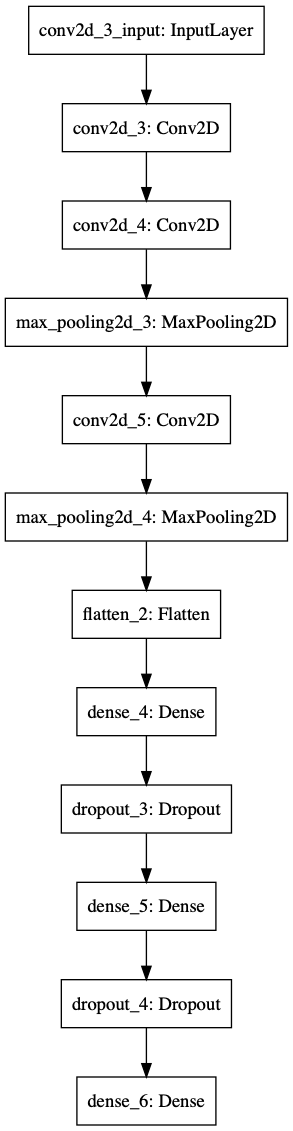

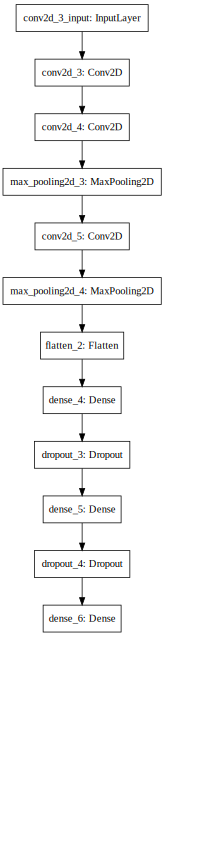

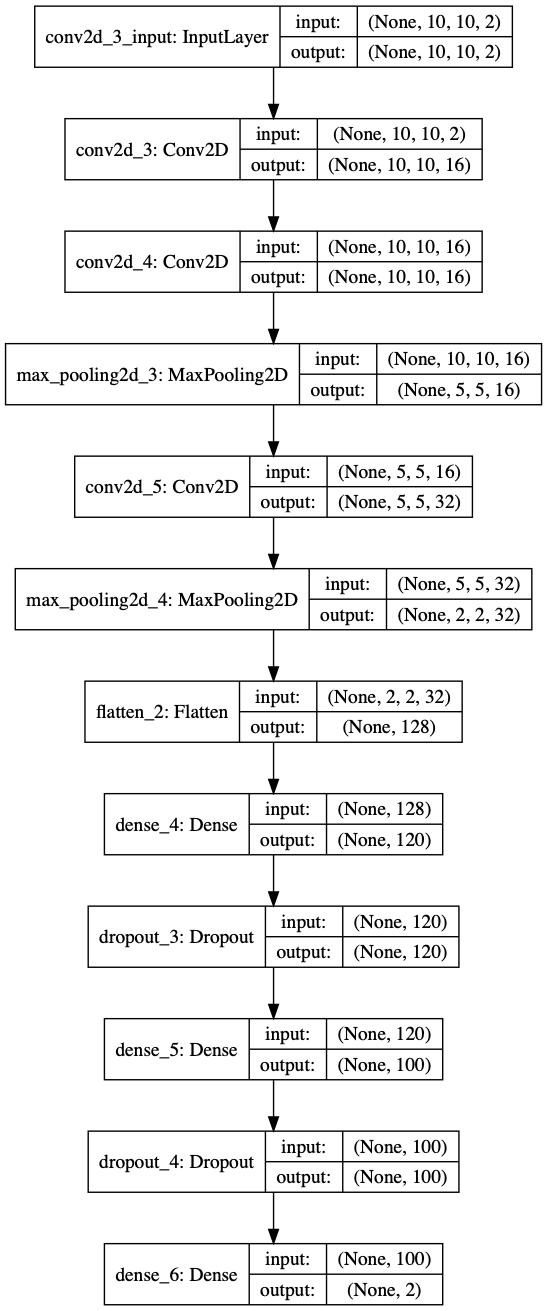

In [100]:
model2.summary()

# from keras.utils.vis_utils import plot_model
#from keras.utils import plot_model
keras.utils.vis_utils.pydot = pydot
plot_model(model2)

# direct plot
SVG(model_to_dot(model2).create(prog='dot', format='svg'))
# to file
plot_model(model2, to_file='model_test.png', show_shapes=True,
        show_layer_names=True, expand_nested=False, dpi=100)
# model.save_weights('file.h5')
# avec le model construit + les poids
# model.load_weights('file.h5')


In [31]:
#creating a mapping of layer name ot layer details 
#we will create a dictionary layers_info which maps a layer name to its charcteristics
#here the layer_weights dictionary will map every layer_name to its corresponding weights
layers_info = {}
layer_weights = {}
for i in model2.layers:
    layers_info[i.name] = i.get_config()
    layer_weights[i.name] = i.get_weights()

# print(layers_info['block5_conv1'])
print(layers_info)
print(layer_weights)

layers = model2.layers
layer_ids = [1,2,3,4,5]
for i in range(1):
    print("Couche", i, layers[layer_ids[i]].get_weights()[0][:,:,:,0][:,:,0])

#plot the filters
fig,ax = plt.subplots(nrows=1,ncols=5)
for i in range(5):
    _ = ax[i].imshow(layers[layer_ids[i]].get_weights()[0][:,:,:,0][:,:,0],cmap='gray')
    ax[i].set_title('block'+str(i+1))
    _ = ax[i].set_xticks([])
    _ = ax[i].set_yticks([])


{'conv2d_1': {'name': 'conv2d_1', 'trainable': True, 'batch_input_shape': (None, 10, 10, 2), 'dtype': 'float32', 'filters': 6, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'max_pooling2d_1': {'name': 'max_pooling2d_1', 'trainable': True, 'dtype': 'float32', 'pool_size': (2, 2), 'padding': 'valid', 'strides': (2, 2), 'data_format': 'channels_last'}, 'conv2d_2': {'name': 'conv2d_2', 'trainable': True, 'dtype': 'float32', 'filters': 16, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': 

IndexError: list index out of range

### Figures

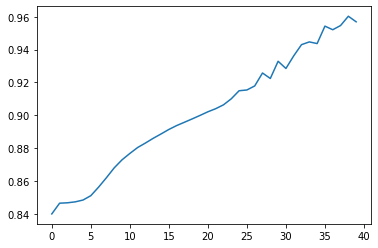

In [116]:
#history0.history
# plot metrics
#_ = plt.plot(history2.history['binary_accuracy'])
_ = plt.plot(history2.history['accuracy'])
_ = plt.show()


### history

dict_keys(['loss', 'accuracy'])
0 blue [[0.4991675890982151, 0.4067410334944725, 0.36690018996596335, 0.3361681766808033, 0.31455214843153956, 0.2998711086809635, 0.28848941177129744, 0.2796101331710815, 0.271892898529768, 0.26497442945837973, 0.2582590378820896, 0.2502781245857477, 0.24387156143784522, 0.23497979156672955, 0.22685821317136287, 0.21805305257439614, 0.20651890262961387, 0.19480094499886036, 0.18422351628541947, 0.17461739294230938, 0.15371048972010612, 0.14475148562341927, 0.12915048617869615, 0.11517611369490624, 0.10778826624155044, 0.08673550616949796, 0.08655184833332896, 0.05584032582119107, 0.06403023162856698, 0.04104834254831076, 0.04372745756991207, 0.027091369358822705, 0.03273713258095086, 0.02511432166211307, 0.01584538137540221, 0.02590697689447552, 0.011570691922679543, 0.01723060836084187, 0.009150249848607928, 0.007369884476065636], [0.8305043, 0.84758735, 0.8530311, 0.86302507, 0.87213194, 0.8791208, 0.8843446, 0.8879572, 0.8905798, 0.8934096, 0.8960581

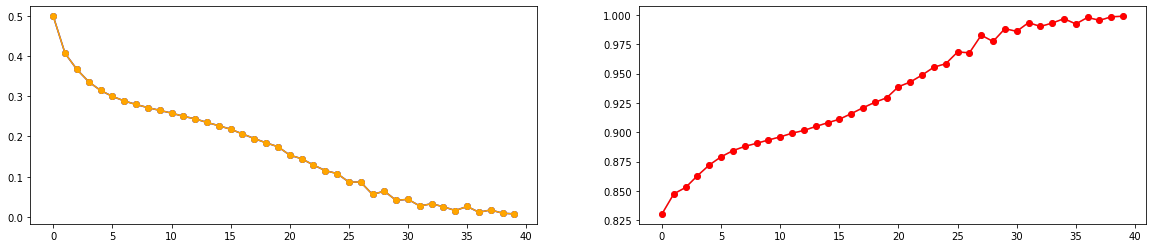

In [102]:
print(history2.history.keys())
coul = ["blue", "lightblue", "orange", "red"]

fig = plt.figure(figsize=(20,4))
_ = plt.subplot(1,2,1)
for i in range(0,4,2):
    print(i,coul[i], list(history2.history.values()))
    #_ = plt.plot(list(history2.history.values())[i],'k-o', color=coul[i])
    _ = plt.plot(list(history2.history.values())[0],'k-o', color=coul[i])
_ = plt.subplot(1,2,2)
for j in range(1,4,2):
    _ = plt.plot(list(history2.history.values())[1],'k-o', color=coul[j])
    

Test loss: 0.1426628679037094
Test accuracy: 0.9693282842636108
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(6863, 2) <class 'pandas.core.frame.DataFrame'>


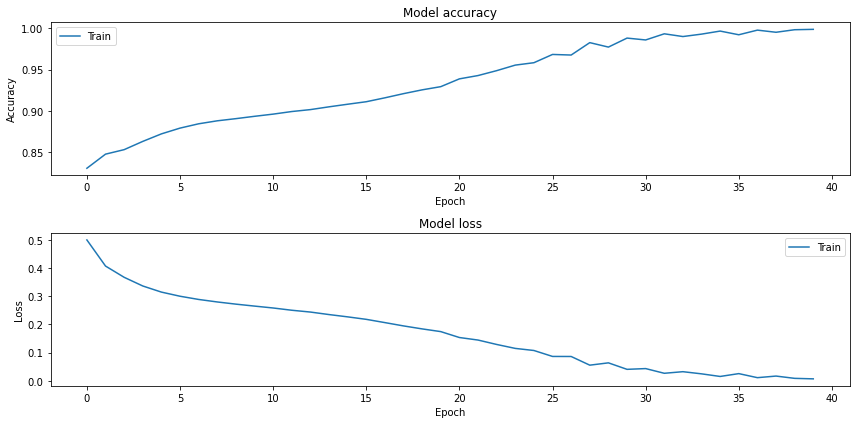

In [103]:
# RESULTATS
if dim == 2:
    score = model2.evaluate(test_data, test_labels, verbose=0, batch_size=batch_size)
    classes = model2.predict(test_data, batch_size=batch_size)
    predictions = model2.predict(test_data[:10])
if dim == 4:
    score = model2.evaluate(test_data, test_labels, verbose=0, steps=batch_size)
    classes = model2.predict(test_data, steps=batch_size)
    predictions = model2.predict(test_data[:100], steps=batch_size)
    
print('Test loss:', score[0])
print('Test accuracy:', score[1])

 #predictions = model2.predict_classes(test_data[:10])
print(np.argmax(predictions, axis=1))
print(test_labels.shape, type(test_labels))

######## TypeError: '(slice(None, 100, None), slice(0, 1, None))' is an invalid key
#print(test_labels[:100,0:1])
# PLOTS training & validation accuracy values
fig = plt.figure(figsize=(12,6))
_ = plt.subplot(2,1,1)
_ = plt.plot(history2.history['accuracy'])
if dim == 2:
    _ = plt.plot(history2.history['val_acc'])
_ = plt.title('Model accuracy')
_ = plt.xlabel('Epoch')
_ = plt.ylabel('Accuracy')
_ = plt.legend(['Train', 'Test'], loc='upper left')

_ = plt.subplot(2,1,2)
_ = plt.plot(history2.history['loss'])
if dim == 2:
    _ = plt.plot(history2.history['val_loss'])
_ = plt.title('Model loss')
_ = plt.xlabel('Epoch')
_ = plt.ylabel('Loss')
_ = plt.legend(['Train','Test'], loc='upper right')

_ = plt.tight_layout()
_ = fig


### Matrice de confusion

In [104]:
print(data_x0.shape, y0[:].shape, y0[1:].shape)
y0[:]


(27449, 10, 10, 2) (27449, 2) (27448, 2)


,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
33251,0.0,1.0
33252,0.0,1.0
33253,0.0,1.0
33254,0.0,1.0


In [105]:
print(test_data.shape, test_labels[:].shape)


(6863, 10, 10, 2) (6863, 2)


start tensor 4D
Echantillon Train: (27449, 10, 10, 2) 27449 27449
Echantillon Test: 6863 6863
(27449,) (27449, 1) (6863,) (6863, 1)
SOMME réelle:  4218.0 1059.0
SOMME prédite: 4493.0 1173.0


[(2.0, -1.0), (-1.0, 2.0)]

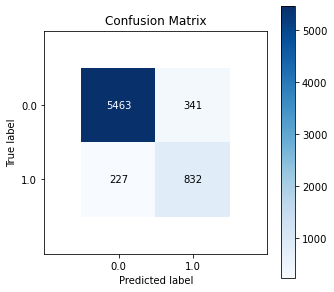

Pourcentages:
Train: 4493.0 4218.0 106.52 %
Test : 1173.0 1059.0 110.76 %


In [159]:
# transforme les matrice en listes d'entiers binaires (0 ou 1)
if dim == 2:
    print("start matrice 2D")
    Y01 = pd.DataFrame(model2.predict(train_data, steps=batch_size)[:,1:])[0].round(0).tolist()
    Y11 = pd.DataFrame(model2.predict(test_data, steps=batch_size)[:,1:])[0].round(0).tolist()
    Y00 = pd.DataFrame(train_labels[:,1:])[0].tolist()
    Y10 = pd.DataFrame(test_labels[:,1:])[0].tolist()
    y_reel = pd.Series(Y10, name='Reel_test')
    y_pred = pd.Series(Y11, name='Prédit_test')
    #df_confusion = pd.crosstab(y_reel, y_pred, rownames=['Reel_test'], colnames=['Predit_test'], margins=True)
    print("\n", df_confusion)
    
if dim == 4:
    print("start tensor 4D")
    Y01 = model2.predict(train_data, steps=batch_size)[:].round(0).tolist()
    Y11 = model2.predict(test_data, steps=batch_size)[:].round(0).tolist()
    Y00 = train_labels[:]
    Y10 = test_labels[:]
#    Y10 = test_labels[1:].numpy().tolist()
#    y_reel = test_labels[1:].numpy()
    y_reel0 = train_labels[1]
    y_pred0 = model2.predict(train_data, steps=batch_size).round(0)[:,1:]
    y_reel = test_labels[1]
    y_pred = model2.predict(test_data, steps=batch_size).round(0)[:,1:]

print("Echantillon Train:", train_data.shape, len(Y00), len(Y01))
#confusion_matrix(Y01, Y00)

print("Echantillon Test:", len(Y10), len(Y11))
#confusion_matrix(Y11, Y10)

print(y_reel0.shape, y_pred0.shape, y_reel.shape, y_pred.shape,)
print("SOMME réelle: ", y_reel0.sum(), y_reel.sum())
print("SOMME prédite:", y_pred0.sum(), y_pred.sum())
#
ax = skplt.metrics.plot_confusion_matrix(y_reel, y_pred, figsize=(5,5), hide_counts=False )
ax.set(xlim=(-1, 2), ylim=(2, -1))
plt.show()

print("Pourcentages:")
print("Train:", y_pred0.sum(), y_reel0.sum(), round(y_pred0.sum() / y_reel0.sum()* 100, 2),"%")
print("Test :", y_pred.sum(),  y_reel.sum(),  round(y_pred.sum() / y_reel.sum()* 100, 2),"%")


In [160]:
# Calcul des 
print(y_reel0.shape, y_pred0.shape, y_reel.shape, y_pred.shape,)
print("SOMME réelle: ", y_reel0.sum(), y_reel.sum())
print("SOMME prédite:", y_pred0.sum(), y_pred.sum())

print("Pourcentages:")
print("Train:", y_pred0.sum(), y_reel0.sum(), round(y_pred0.sum() / y_reel0.sum()* 100, 2),"%")
print("Test :", y_pred.sum(),  y_reel.sum(),  round(y_pred.sum() / y_reel.sum()* 100, 2),"%")

df_res0 = pd.DataFrame(y_reel0).reset_index().rename(columns={1: "reel"})
df_res0['pred'] = pd.DataFrame(y_pred0)
df_res0['diff'] = df_res0['pred'] - df_res0['reel']
TN0  = len(df_res0[(df_res0['pred'] == 0) & (df_res0['reel'] == 0)])
FP0  = len(df_res0[(df_res0['pred'] == 0) & (df_res0['reel'] == 1)])
FN0  = len(df_res0[(df_res0['pred'] == 1) & (df_res0['reel'] == 0)])
TP0  = len(df_res0[(df_res0['pred'] == 1) & (df_res0['reel'] == 1)])
if (TP0 + FN0) != 0:
    TPR0 = round(TP0 / (TP0 + FN0),3)   # TP / P
else:
    TPR0 = int(0)
FPR0 = round(FP0 / (TN0 + FP0),3)   # FP / N
ACC0 = round((TP0 + TN0) / (TN0 + FP0 + FN0 + TP0),3)  # TP + TN / (P + N)
PUR0 = round(TP0 / (TP0 + FP0),3) # PUR=PRECIS = TP / (TP + FP)

print("\n Pourcentages:")
print('Valeurs:', TN0, FP0, FN0, TP0)
print("Train 0:", round(TN0 / (TN0+FN0)* 100, 2),"%")
print("Train 1: ", round(TP0 / (FP0+TP0)* 100, 2),"%")

df_res = pd.DataFrame(y_reel).reset_index().rename(columns={1: "reel"})
df_res['pred'] = pd.DataFrame(y_pred)
df_res['diff'] = df_res['pred'] - df_res['reel']
TN = len(df_res[(df_res['pred'] == 0) & (df_res['reel'] == 0)])
FP = len(df_res[(df_res['pred'] == 0) & (df_res['reel'] == 1)])
FN = len(df_res[(df_res['pred'] == 1) & (df_res['reel'] == 0)])
TP = len(df_res[(df_res['pred'] == 1) & (df_res['reel'] == 1)])
if (TP + FN) != 0:
    TPR = round(TP / (TP + FN),3)   # TP / P
else:
    TPR = int(0)
FPR = round(FP / (TN + FP),3)   # FP / N
ACC = round((TP + TN) / (TP + TN + FP + FN),3)  # TP + TN / (P + N)
PUR = round(TP / (TP + FP),3) # PUR=PRECIS = TP / (TP + FP)
MCC1 = (TP * TN) - (FP * FN)
MCC2 = (TP+FP)*(TP+FN)*(TN*FP)*(TN+FN)
MCC  = round(MCC1 / np.sqrt(MCC2),4)
TrueTest   = TP  + FP
FalseTest  = FN  + FN
TrueTrain  = TP0 + FP0
FalseTrain = FP0 + FN0

print("Pourcentages:")
print('Valeurs:', TN, FP, FN, TP)
print("Test 0:", round(TN / (TN+FN)* 100, 2),"%")
print("Test 1: ", round(TP / (FP+TP)* 100, 2),"%")

print("True Pos Rate:", TPR, " False Pos Rate:", FPR)
print("Accuracy:", ACC, " Purity:", PUR, " Matthews:", MCC)
print("Accuracy0:", ACC0, " Purity:", PUR0)

(27449,) (27449, 1) (6863,) (6863, 1)
SOMME réelle:  4218.0 1059.0
SOMME prédite: 4493.0 1173.0
Pourcentages:
Train: 4493.0 4218.0 106.52 %
Test : 1173.0 1059.0 110.76 %

 Pourcentages:
Valeurs: 22223 733 1008 3485
Train 0: 95.66 %
Train 1:  82.62 %
Pourcentages:
Valeurs: 5463 227 341 832
Test 0: 94.12 %
Test 1:  78.56 %
True Pos Rate: 0.709  False Pos Rate: 0.04
Accuracy: 0.917  Purity: 0.786  Matthews: 0.0473
Accuracy0: 0.937  Purity: 0.826


In [161]:
# Delete first the dataframe 
#del df_RES; df_RES = None

# df_RES = None et resN=0 ....  EN DEBUT de programme

fileRES = DATA_DIR9 + "results_" + str(0) + ".txt"
if (os.path.exists(fileRES)):
    maxi = 0
    for file in glob.glob(DATA_DIR9 +"results_*.txt"):    
        fileN = os.path.basename(file)
        subs = int(fileN.split("_")[1].split(".")[0])
        if subs >= maxi:
            maxi = subs
        resN = maxi
        print(fileN, maxi, resN)
    
    resN += 1
    fileRES = DATA_DIR9 + "results_" + str(resN) + ".txt"

indexRES = ['TN', 'FP', 'FN', 'TP', 'TPR', 'FPR', 'ACC', 'PUR','MCC',
            'TN0','FP0','FN0','TP0','TPR0','FPR0','ACC0','PUR0','True-Test',
            'True-Train','False-Test','False-Train']
listeRES = [TN,FP,FN,TP,TPR,FPR,ACC,PUR,MCC, TN0,FP0,FN0,TP0,TPR0,FPR0,ACC0,
            PUR0,TrueTest,FalseTest,TrueTrain,FalseTrain]

if df_RES is None:
    df_RES = pd.DataFrame(listeRES, index=indexRES, columns=[colRES])
else:
    if not colRES in df_RES.columns:
        print(colRES, "\n", listeRES)
        #df_RES = df1.assign(e=e.values)  #df_RES.insert(listeRES, colonne)
        df_RES[str(colRES)] = listeRES

#df_RES_T['True-Test']   = df_RES_T['TP']  + df_RES_T['FP']
#df_RES_T['False-Test']  = df_RES_T['FP']  + df_RES_T['FN']
#df_RES_T['True-Train']  = df_RES_T['TP0'] + df_RES_T['FP0']
#df_RES_T['False-Train'] = df_RES_T['FP0']  + df_RES_T['FN0']
df_RES_T = df_RES.T

# converti en entiers certaines colonnes
list_col = ['TN','FP','FN','TP','TN0','FP0','FN0','TP0','True-Test','True-Train','False-Test','False-Train']
df_RES_T[list_col] = df_RES_T[list_col].astype(int)
resultats = df_RES_T.to_csv(fileRES, sep=",", index=True, header=True)
#df_RES.drop(['2_5_20_2_16_0.1'], axis=1, inplace=True)

df_RES_T
#df_RES_T.describe()

results_0.txt 0 0
results_20200326.txt 20200326 20200326
results_20200325.txt 20200326 20200326
MODELE: 1_3_40_40_16_0.3_120_100_3
1_3_40_40_16_0.3_120_100_3 
 [5463, 227, 341, 832, 0.709, 0.04, 0.917, 0.786, 0.0473, 22223, 733, 1008, 3485, 0.776, 0.032, 0.937, 0.826, 1059, 568, 4218, 1741]


,TN,FP,FN,TP,TPR,FPR,ACC,PUR,MCC,TN0,...,FN0,TP0,TPR0,FPR0,ACC0,PUR0,True-Test,True-Train,False-Test,False-Train
1_4_10_2_16_0.1_120_100_3,5804,1412,0,0,0.000,0.196,0.804,0.000,NaN,23232,...,0,0,0.000,0.195,0.805,0.000,1412,1412,5624,5624
2_3_40_40_16_0.1_120_100_3,5601,6,203,1053,0.838,0.001,0.970,0.994,0.3661,23226,...,5,4203,0.999,0.001,0.999,0.996,1059,209,4218,20
1_3_80_40_16_0.1_120_100_3,5610,48,194,1011,0.839,0.008,0.965,0.955,0.1268,23181,...,50,4101,0.988,0.005,0.994,0.972,1059,242,4218,167
2_3_40_20_16_0.1_120_100_3,5588,98,216,961,0.816,0.017,0.954,0.907,0.0850,22927,...,304,3950,0.929,0.012,0.979,0.936,1059,314,4218,572
1_3_40_40_16_0.1_100_100_3,5651,418,153,641,0.807,0.069,0.917,0.605,0.0331,22920,...,311,2743,0.898,0.060,0.935,0.650,1059,571,4218,1786
1_3_40_40_16_0.1_120_100_3,5461,188,343,871,0.717,0.033,0.923,0.822,0.0536,22302,...,929,3593,0.795,0.027,0.943,0.852,1059,531,4218,1554
3_3_40_20_16_0.3_120_100_3,5654,133,150,926,0.861,0.023,0.959,0.874,0.0740,22974,...,257,3859,0.938,0.015,0.978,0.915,1059,283,4218,616
1_3_40_20_16_0.1_120_100_3,5466,354,338,705,0.676,0.061,0.899,0.666,0.0335,22042,...,1189,2946,0.712,0.055,0.910,0.698,1059,692,4218,2461
1_3_40_40_16_0.2_120_100_3,5715,510,89,549,0.861,0.082,0.913,0.518,0.0289,22959,...,272,2391,0.898,0.074,0.924,0.567,1059,599,4218,2099
1_3_40_40_16_0.3_120_100_3,5463,227,341,832,0.709,0.040,0.917,0.786,0.0473,22223,...,1008,3485,0.776,0.032,0.937,0.826,1059,568,4218,1741


In [82]:
listeRES_0 = [[0   ,   1, 118,472,530,994,1240,858,1279,1294],
              [1059,1411,1645,940,882,418,172, 554, 133, 118],
              [   0,   7, 472,1908, 2118,4110,5000,3538,5137,5210],
              [4218,5617,6560,3717,3506,1514, 624,2086, 487, 414]]
colRES_0 = ["1_3_10_2","1_4_10_2","1_5_10_2","1_4_100_2","1_4_20_10","1_4_400_2",
            "1_4_80_10","1_4_10_80","1_4_40_20","1_4_20_40"]
df_RES_0 = pd.DataFrame(listeRES_0, index=['TP','FP','TP0','FP0'], columns=colRES_0)

df_RES_0T = df_RES_0.T

df_RES_0T['True-Test'] = df_RES_0T['TP'] + df_RES_0T['FP']
df_RES_0T['True-Train'] = df_RES_0T['TP0'] + df_RES_0T['FP0']
df_RES_0T['TPR']  = round(df_RES_0T['TP']  / (df_RES_0T['TP']  + df_RES_0T['FP']),3)
df_RES_0T['TPR0'] = round(df_RES_0T['TP0'] / (df_RES_0T['TP0'] + df_RES_0T['FP0']),3)

#FPR = round(FP / (TN + FP),3)   # FP / N
#ACC = round((TP + TN0) / (TN + FP + FN + TP),3)  # TP + TN / (P + N)
#PUR = round(TP / (TP + FP),3) # PUR=PRECIS = TP / (TP + FP)

df_RES_0T

resultats_0 = df_RES_0T.to_csv(DATA_DIR9 +"results-départ.txt", sep=",", index=True, header=True)

,TP,FP,TP0,FP0,True-Test,True-Train,TPR,TPR0
1_3_10_2,0,1059,0,4218,1059,4218,0.000,0.000
1_4_10_2,1,1411,7,5617,1412,5624,0.001,0.001
1_5_10_2,118,1645,472,6560,1763,7032,0.067,0.067
1_4_100_2,472,940,1908,3717,1412,5625,0.334,0.339
1_4_20_10,530,882,2118,3506,1412,5624,0.375,0.377
1_4_400_2,994,418,4110,1514,1412,5624,0.704,0.731
1_4_80_10,1240,172,5000,624,1412,5624,0.878,0.889
1_4_10_80,858,554,3538,2086,1412,5624,0.608,0.629
1_4_40_20,1279,133,5137,487,1412,5624,0.906,0.913
1_4_20_40,1294,118,5210,414,1412,5624,0.916,0.926


In [ ]:
#df_RESULTATS = pd.read_csv(DATA_DIR9+"results_2.txt", sep=",")
#df_RESULTATS['ACC'] = round((df_RESULTATS['TP'] + df_RESULTATS['TN']) / (df_RESULTATS['TP'] + df_RESULTATS['TN'] + df_RESULTATS['FP'] + df_RESULTATS['FN']),3)
#df_RESULTATS.rename({"Unnamed: 0":"id"})
#df_RESULTATS.index = (list(df_RESULTATS["Unnamed: 0"]))
#df_RES.drop(['Unnamed: 0','True-Test','True-Train','False-Test','False-Train'],inplace=True)
#df_RES_T = df_RES.T
#df_RES.drop(['Unnamed: 0'])
#df_RES_T = df_RESULTATS.drop(['Unnamed: 0'], axis=1)
#df_RES = df_RES_T.T


In [162]:
df_RESULTATS = pd.read_csv(DATA_DIR9 +"results-4fois.txt", sep=",")

#pd.set_option('display.max_rows', df_RESULTATS.shape[0]+1)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)
#pd.reset_option("all")

df_TPR = df_RESULTATS.sort_values(['TPR'], ascending=False)
df_FPR = df_RESULTATS.sort_values(['FPR'], ascending=True)
df_TP  = df_RESULTATS.sort_values(['TP'], ascending=False)
df_TN  = df_RESULTATS.sort_values(['TN'], ascending=False)
df_ACC = df_RESULTATS.sort_values(['ACC'], ascending=False)
df_PUR = df_RESULTATS.sort_values(['PUR'], ascending=False)
#df_RESULTATS.sort_values(['FP'], ascending=True)
df_TOUT = df_TP.merge()

TypeError: merge() missing 1 required positional argument: 'right'

# KERAS hyperparametres

Nombre de couches cachées

Nombre de neurones pour chaques couches cachées

Fonction d'activation

Taux apprentissage (alpha ?) ... et sa décroissance

Momentum – β

Adam’s hyperparameter – β1, β2, ε

Taille Mini-batch 


In [116]:
print(train_data)
print(type(train_labels))

Tensor("concat_1:0", shape=(28856, 10, 10, 2), dtype=float64)
<class 'pandas.core.frame.DataFrame'>


In [110]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

filt      = 3    # 5
filters   = (filt, filt)
strides   = (1,1)
drop  = 0.1         # 0.5

def create_model(neurons=1, optimizer='adam', dropout_rate=0.0, learn_rate=0.01, momentum=0, 
                 init_mode='uniform', activation='relu', weight_constraint=0):
    # create model
    model = Sequential()
    model.add(Conv2D(6 , filters, padding="same", strides=(1,1), input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(16, filters, padding="same", strides=(1,1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(120, activation="relu"))
    model.add(Dropout(drop))
    model.add(Dense(100, activation="relu"))
    model.add(Dropout(drop))
    model.add(Dense(2, activation="sigmoid"))
    #model = Sequential()
    #model.add(Dense(neurons, kernel_initializer=init_mode, input_dim=8, activation=activation)'))
    #model.add(Dropout(dropout_rate))
    #model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    # Compile model
    #optimizer = SGD(lr=learn_rate, momentum=momentum)
    #model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
            
# fix random seed for reproducibility
np.random.seed(42)

# load dataset
train_data, test_data     = (data_x0, data_x1)
train_labels, test_labels = (y0, y1)
# split into input (X) and output (Y) variables
X = train_data
Y = train_labels


# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, dropout_rate=0.2, verbose=0)
            
# define the grid search parameters
#  Beta1 = 0.9
#  Beta2 = 0.999
#  Epsilon = 10e-8
learn_rate = [0.001, 0.01, 0.1]   # [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9, 0.99]
batch_size = [10, 20, 60]   #  [10, 20, 40, 60, 80, 100]
epochs = [10, 20, 40]    # [10, 20, 40, 60, 100]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
weight_constraint = [i for i in range (1, 6, 1)]
dropout_rate = [i/10 for i in range (0, 5, 1)]
neurons = [1, 5, 10, 15, 20, 25, 30]

param_grid = dict(learn_rate=learn_rate, batch_size=batch_size, epochs=epochs)

#param_grid = dict(neurons=neurons, learn_rate=learn_rate, momentum=momentum, optimizer=optimizer, 
#                init_mode=init_mode, batch_size=batch_size, epochs=epochs, activation=activation,
#                dropout_rate=dropout_rate, weight_constraint=weight_constraint)
#  score = ???
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)   # n_jobs=-1  parallisation
grid_result = grid.fit(X, Y)

# summarize results ==>  best_score et best_params_
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

TypeError: Expected sequence or array-like, got <class 'tensorflow.python.framework.ops.Tensor'>

# TESTS

In [14]:
from keras.models import Sequential
from keras.layers import Dense

# fix random seed for reproducibility
np.random.seed(7)
# load pima indians dataset
dataset = np.loadtxt(DATA_DIR10 + "data/pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
modelX = Sequential()
modelX.add(Dense(12, input_dim=8, activation='relu'))
modelX.add(Dense(8, activation='relu'))
modelX.add(Dense(1, activation='sigmoid'))
# Compile model
modelX.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
modelX.fit(X, Y, epochs=3, batch_size=10)
# evaluate the model
scores = modelX.evaluate(X, Y)
print("\n%s: %.2f%%" % (modelX.metrics_names[1], scores[1]*100))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/3
768/768 [==============================] - 0s 357us/step - loss: 3.7194 - accuracy: 0.5990
Epoch 2/3
768/768 [==============================] - 0s 115us/step - loss: 0.9369 - accuracy: 0.5911
Epoch 3/3
768/768 [==============================] - 0s 120us/step - loss: 0.7472 - accuracy: 0.6406


768/768 [==============================] - 0s 53us/step

accuracy: 66.93%


In [15]:
ann_viz(modelX, view=True, title="My first neural network")

In [53]:
modelY = Sequential()
modelY.add(Conv2D(cv2d0 , filters, padding="same", strides=strides, input_shape=input_shape))
modelY.add(Conv2D(2*cv2d, filters, padding="same", strides=strides))
modelY.add(MaxPooling2D(pool_size=pool_size))
modelY.add(Flatten())
modelY.add(Dense(dens1, activation='relu'))
modelY.add(Dropout(drop))
modelY.add(Dense(dens2, activation='relu'))
modelY.add(Dropout(drop))
modelY.add(Dense(2, activation=activ))   

NameError: name 'cv2d0' is not defined

In [54]:
ann_viz(modelX, view=True, title="My first neural network")

NameError: name 'modelX' is not defined

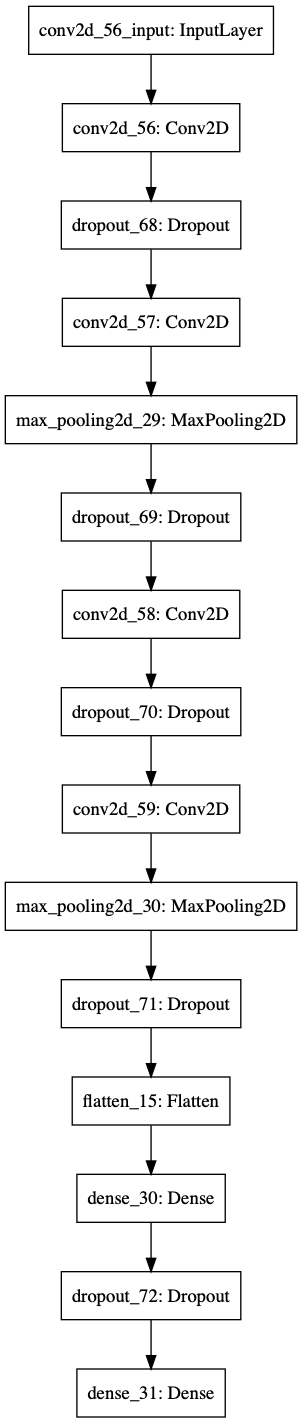

In [60]:
def build_cnn_model():
    model = keras.models.Sequential()
    model.add(Conv2D(32, (3, 3),padding="same",input_shape=(10, 10, 3),activation="relu"))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3),padding="same",input_shape=(32, 32, 3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3),padding="same",input_shape=(32, 32, 3),activation="relu"))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3),padding="same",input_shape=(32, 32, 3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation="softmax"))
    return model

model = build_cnn_model()
ann_viz(model, filename="RN_1.gv", title="TEST", orient="LR")   #  BT or LR
plot_model(model, to_file='vgg.png')

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

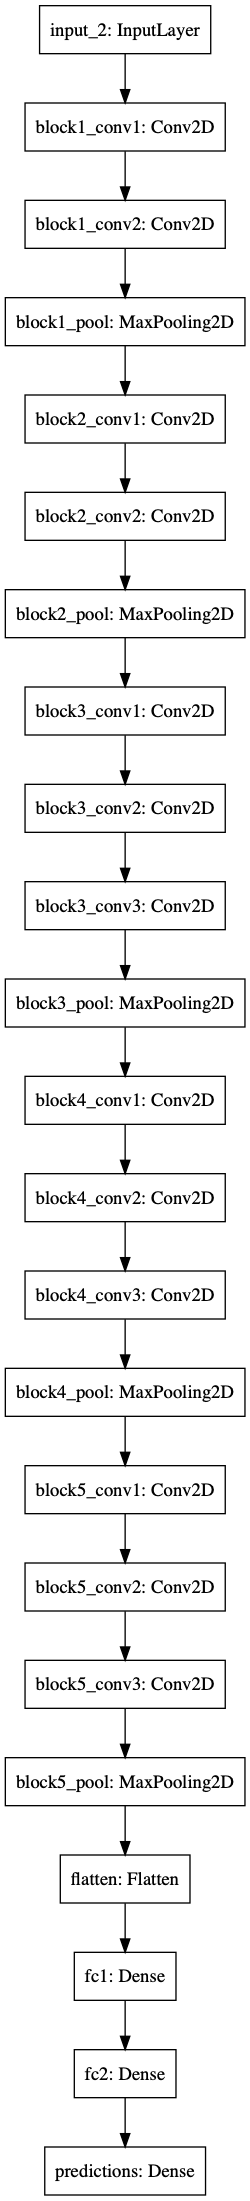

In [57]:
#importing required modules
from keras.applications import VGG16
#loading the saved model we are using the complete architecture thus include_top=True
modelvgg16 = VGG16(weights='imagenet',include_top=True)
#show the summary of model
modelvgg16.summary()

# plot_model(modelvgg16, to_file='vgg.png')